In [1]:
import pickle
import itertools
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
spatial_planning = pd.read_csv('raumordnung.csv')
spatial_planning

,_id,ags2,bundesland,ags5,kreis,kr_amr,kr_ead,kr_land,kr_mz,kr_oz,...,kr_grw_fg_kl,kr_sr_am_kl,kr_rl_kl,kr_ssk_kl,kr_ssr_kl,kr_stla_kl,kr_mra_kl,kr_mrb_kl,kr_wo_kl,kr_grenze
0,1,1,Schleswig-Holstein,1001,"Flensburg, Stadt",4,2309.4,0.0,0,1,...,1,3,2,4,3,2,99,99,1,1
1,2,1,Schleswig-Holstein,1002,"Kiel, Landeshauptstadt",6,3112.1,0.0,0,1,...,4,1,2,1,2,1,99,99,1,0
2,3,1,Schleswig-Holstein,1003,"Lübeck, Hansestadt",5,1453.6,0.0,0,1,...,4,1,1,1,2,1,5,99,1,0
3,4,1,Schleswig-Holstein,1004,"Neumünster, Stadt",6,1644.7,0.0,0,1,...,6,1,2,3,2,2,5,99,1,0
4,5,1,Schleswig-Holstein,1051,Dithmarschen,2,121.9,74.2,2,0,...,1,3,4,4,3,2,5,99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,397,16,Thüringen,16073,Saalfeld-Rudolstadt,256,138.9,47.4,3,0,...,2,3,3,4,2,2,99,99,2,0
397,398,16,Thüringen,16074,Saale-Holzland-Kreis,244,134.7,55.3,4,0,...,2,1,3,3,2,2,99,99,2,0
398,399,16,Thüringen,16075,Saale-Orla-Kreis,257,97.1,85.3,3,0,...,2,3,3,4,2,2,99,99,2,2
399,400,16,Thüringen,16076,Greiz,243,153.0,60.4,2,0,...,2,1,3,2,2,1,99,99,2,0


In [4]:
categorical_columns = ['kr_amr', 'kr_wa_schr_kl', 'kr_amt_kl', 'kr_grw_fg_kl', 'kr_sr_am_kl', 'kr_rl_kl', 'kr_ssk_kl', 'kr_ssr_kl', 'kr_stla_kl', 'kr_mra_kl', 'kr_mrb_kl', 'kr_wo_kl', 'kr_grenze']
categorical_columns_translated = ['labor market region', 'growing / shrinking circles', 'labor market type', 'grw funding framework', 'settlement structure type of labor market region', 'room type location', 'district settlement structure', 'type of settlement structure', 'urban / rural', 'metropolitan region', 'metropolitan area', 'east west', 'border proximity']
assert len(categorical_columns) == len(categorical_columns_translated)

In [5]:
useful_df = spatial_planning[categorical_columns]
useful_df.columns = [col.replace(' ', '_') for col in categorical_columns_translated]
useful_df.index = spatial_planning['ags5']
useful_df

,labor_market_region,growing_/_shrinking_circles,labor_market_type,grw_funding_framework,settlement_structure_type_of_labor_market_region,room_type_location,district_settlement_structure,type_of_settlement_structure,urban_/_rural,metropolitan_region,metropolitan_area,east_west,border_proximity
ags5,,,,,,,,,,,,,
1001,4,5,5,1,3,2,4,3,2,99,99,1,1
1002,6,4,2,4,1,2,1,2,1,99,99,1,0
1003,5,4,5,4,1,1,1,2,1,5,99,1,0
1004,6,4,5,6,1,2,3,2,2,5,99,1,0
1051,2,4,5,1,3,4,4,3,2,5,99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16073,256,1,10,2,3,3,4,2,2,99,99,2,0
16074,244,2,10,2,1,3,3,2,2,99,99,2,0
16075,257,1,11,2,3,3,4,2,2,99,99,2,2


In [39]:
data_dict = {}

for col in useful_df.columns:
    for val in useful_df[col].unique():
        data_dict[col + '_' + str(val)] = list(useful_df.index[useful_df[col] == val])
        
data_dict

{'labor_market_region_4': [1001, 1059],
 'labor_market_region_6': [1002, 1004, 1057, 1058],
 'labor_market_region_5': [1003, 1055],
 'labor_market_region_2': [1051],
 'labor_market_region_7': [1053],
 'labor_market_region_1': [1054],
 'labor_market_region_8': [1056, 1060, 1062, 2000, 3353],
 'labor_market_region_3': [1061],
 'labor_market_region_9': [3101, 3157, 3158],
 'labor_market_region_10': [3102],
 'labor_market_region_11': [3103, 3151],
 'labor_market_region_13': [3153],
 'labor_market_region_14': [3154],
 'labor_market_region_15': [3155],
 'labor_market_region_12': [3159],
 'labor_market_region_17': [3241],
 'labor_market_region_18': [3251],
 'labor_market_region_19': [3252],
 'labor_market_region_20': [3254],
 'labor_market_region_21': [3255],
 'labor_market_region_22': [3256],
 'labor_market_region_23': [3257],
 'labor_market_region_24': [3351],
 'labor_market_region_43': [3352, 4012],
 'labor_market_region_29': [3354, 3360],
 'labor_market_region_25': [3355],
 'labor_market_

In [60]:
edge_weights = {}

for key, kreis_list in data_dict.items():
    
    kreis_list.sort() # sort it to force the pairs to the lower triangle
    
    # make all the edges (kr1, kr2)
    pairs = [(kreis_list[p1], kreis_list[p2]) for p1 in range(len(kreis_list)) for p2 in range(p1+1,len(kreis_list))]
    
    for pair in pairs:
        try:
            edge_weights[(pair[0], pair[1])] +=1
        except:
            edge_weights[(pair[0], pair[1])] = 1

edge_weights

{(1001, 1059): 12,
 (1002, 1004): 8,
 (1002, 1057): 8,
 (1002, 1058): 8,
 (1004, 1057): 9,
 (1004, 1058): 11,
 (1057, 1058): 11,
 (1003, 1055): 8,
 (1056, 1060): 9,
 (1056, 1062): 12,
 (1056, 2000): 8,
 (1056, 3353): 10,
 (1060, 1062): 10,
 (1060, 2000): 7,
 (1060, 3353): 10,
 (1062, 2000): 9,
 (1062, 3353): 11,
 (2000, 3353): 8,
 (3101, 3157): 10,
 (3101, 3158): 9,
 (3157, 3158): 11,
 (3103, 3151): 9,
 (3352, 4012): 7,
 (3354, 3360): 11,
 (3356, 3401): 10,
 (3356, 4011): 9,
 (3401, 4011): 7,
 (3402, 3452): 13,
 (3403, 3458): 11,
 (3404, 3459): 8,
 (3405, 3455): 12,
 (3405, 3462): 8,
 (3455, 3462): 8,
 (5111, 5158): 11,
 (5111, 5162): 9,
 (5158, 5162): 10,
 (5112, 5119): 10,
 (5112, 5170): 9,
 (5119, 5170): 9,
 (5113, 5117): 13,
 (5122, 5124): 13,
 (5314, 5382): 12,
 (5315, 5362): 10,
 (5315, 5378): 10,
 (5362, 5378): 12,
 (5512, 5513): 12,
 (5512, 5562): 10,
 (5512, 5916): 12,
 (5513, 5562): 9,
 (5513, 5916): 13,
 (5562, 5916): 9,
 (5515, 5558): 9,
 (5515, 5570): 10,
 (5558, 5570): 9,

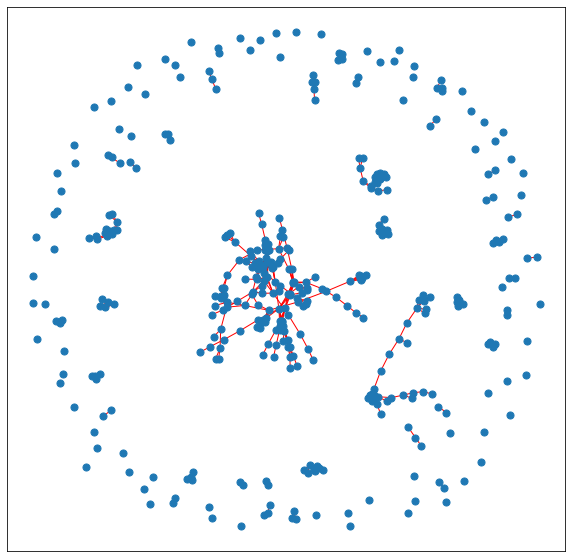

In [61]:
weight_treshold = 10

G = nx.Graph()
G.add_nodes_from(spatial_planning['ags5'])

for key, val in edge_weights.items():
    if val > weight_treshold:
        G.add_edge(*key)

plt.figure(figsize =(10, 10))
nx.draw_networkx(G, edge_color=(1,0,0), node_size=50, with_labels=False)

In [ ]:
clusters = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [1]:
    for c in clusters:
    c = list(c)
    c = [str(i) for i in c]
    counties = df[df['ags5'].isin(c)]
    print(list(counties['kreis']))

IndentationError: expected an indented block (<ipython-input-1-134a6764d399>, line 2)

spatial_planning